## Parsing Logs and Storing them in DataFrame

In [ ]:
import re
import pandas as pd

In [ ]:
# Load the log file

log_file_path = './logs/sample_webserver.log'

In [ ]:
#Define the log pattern using regex

log_pattern = re.compile(
    r'(?P<ip>\d+\.\d+\.\d+\.\d+)\s-\s-\s'
    r'\[(?P<timestamp>.+?)\]\s'
    r'"(?P<method>\w+)\s(?P<resource>/\S*)\s(?P<protocol>HTTP/\d\.\d)"\s'
    r'(?P<status>\d+)\s(?P<size>\d+)'
)

In [ ]:
#store parsed logs
logs=[]

In [ ]:
#Read parse each line
with open (log_file_path, 'r') as file:
    for line in file:
        match = log_pattern.match(line)
        if match:
            logs.append(match.groupdict())

In [ ]:
#Create Dataframe
df_logs = pd.DataFrame(logs)

In [ ]:
# Convert timestamp into datetime
df_logs["timestamp"] = pd.to_datetime(df_logs["timestamp"].str.strip(), format="%d/%b/%Y:%H:%M:%S")

In [214]:
# Convert numeric fields and rename column:

df_logs['status'] = df_logs['status'].astype(int)
df_logs['size'] = df_logs['size'].astype(int)

df_logs.rename(columns={ 'resource' : 'url'}, inplace= True )

df_logs.head()

,ip,timestamp,method,url,protocol,status,size
0,192.196.136.116,2025-04-15 09:49:05,PUT,/contact,HTTP/1.0,400,2535
1,170.132.19.142,2025-04-15 10:54:52,GET,/register,HTTP/1.0,200,1612
2,219.134.218.234,2025-04-16 05:57:40,GET,/index.html,HTTP/2.0,503,4713
3,204.82.65.81,2025-04-15 14:52:33,POST,/about,HTTP/1.1,500,871
4,119.223.252.231,2025-04-15 16:59:49,DELETE,/products,HTTP/2.0,301,4930


In [216]:
#Check for Null or Missing value

print("Missing value: ")
print(df_logs.isnull().sum())

Missing value: 
ip           0
timestamp    0
method       0
url          0
protocol     0
status       0
size         0
dtype: int64


In [220]:
# Data Overview
df_logs.head()

,ip,timestamp,method,url,protocol,status,size
0,192.196.136.116,2025-04-15 09:49:05,PUT,/contact,HTTP/1.0,400,2535
1,170.132.19.142,2025-04-15 10:54:52,GET,/register,HTTP/1.0,200,1612
2,219.134.218.234,2025-04-16 05:57:40,GET,/index.html,HTTP/2.0,503,4713
3,204.82.65.81,2025-04-15 14:52:33,POST,/about,HTTP/1.1,500,871
4,119.223.252.231,2025-04-15 16:59:49,DELETE,/products,HTTP/2.0,301,4930


In [222]:
#Summary Stats
df_logs.describe(include="all")

,ip,timestamp,method,url,protocol,status,size
count,500,500,500,500,500,500.000000,500.000000
unique,500,NaN,4,7,3,NaN,NaN
top,192.196.136.116,NaN,PUT,/api/data,HTTP/1.0,NaN,NaN
freq,1,NaN,140,76,179,NaN,NaN
mean,NaN,2025-04-15 20:19:30.030000128,NaN,NaN,NaN,396.704000,2566.874000
min,NaN,2025-04-15 06:21:59,NaN,NaN,NaN,200.000000,208.000000
25%,NaN,2025-04-15 13:48:02.500000,NaN,NaN,NaN,302.000000,1468.250000
50%,NaN,2025-04-15 20:28:33.500000,NaN,NaN,NaN,403.000000,2561.000000
75%,NaN,2025-04-16 03:05:46.750000128,NaN,NaN,NaN,500.000000,3693.750000
max,NaN,2025-04-16 10:06:47,NaN,NaN,NaN,503.000000,4986.000000


In [224]:
#data types
df_logs.dtypes

ip                   object
timestamp    datetime64[ns]
method               object
url                  object
protocol             object
status                int32
size                  int32
dtype: object

In [236]:
#save the parsed log data to csv
df_logs.to_csv("parsed_log.csv", index = True)
print("Parsed data saved to 'parsed_log.csv'")

Parsed data saved to 'parsed_log.csv'


## Log Data Cleaning & Exploration

In [268]:
import matplotlib
from matplotlib import pyplot as plt

In [266]:
#Load the cleaned structured log file
log_path = "./logs/parsed_log.csv"

df_logs1 = pd.read_csv(log_path)
df_logs1.head()

,Unnamed: 0,ip,timestamp,method,url,protocol,status,size
0,0,192.196.136.116,2025-04-15 09:49:05,PUT,/contact,HTTP/1.0,400,2535
1,1,170.132.19.142,2025-04-15 10:54:52,GET,/register,HTTP/1.0,200,1612
2,2,219.134.218.234,2025-04-16 05:57:40,GET,/index.html,HTTP/2.0,503,4713
3,3,204.82.65.81,2025-04-15 14:52:33,POST,/about,HTTP/1.1,500,871
4,4,119.223.252.231,2025-04-15 16:59:49,DELETE,/products,HTTP/2.0,301,4930


In [270]:
# 1. Strip trailing spaces from timestamp & converting it into datetime

if df_logs1['timestamp'].dtype == 'object':
    df_logs1['timestamp'] = df_logs1['timestamp'].str.strip()

# convertion into datetime
try:
   df_logs1['timestamp'] = pd.to_datetime(df_logs1['timestamp'])
except Exception as e:
    print("Datetime parsing failed: ", e)


In [256]:
#Check for missing values
print("\n Missing values per column: ")
print(df_logs1.isnull().sum())


 Missing values per column: 
Unnamed: 0    0
ip            0
timestamp     0
method        0
url           0
protocol      0
status        0
size          0
dtype: int64


In [258]:
# Drop rows with essential missing data
essential_col = ['ip','timestamp','method','url','status']
df_logs1.dropna(subset= essential_col, inplace = True)

In [260]:
# Basic exploration
print("\n Top 10 IPs request count : ")
print(df_logs1['ip'].value_counts().head(10))

print("\n Top 10 IPs requested Url : ")
print(df_logs1['url'].value_counts().head(10))

print("\n HTTP Status code Distribution : ")
print(df_logs1['status'].value_counts().head())



 Top 10 IPs request count : 
ip
192.196.136.116    1
139.106.129.99     1
169.23.119.146     1
173.100.12.34      1
49.252.199.212     1
168.234.37.232     1
136.253.244.68     1
81.215.107.184     1
179.216.196.78     1
50.154.20.220      1
Name: count, dtype: int64

 Top 10 IPs requested Url : 
url
/api/data      76
/about         75
/products      74
/contact       72
/register      70
/index.html    70
/login         63
Name: count, dtype: int64

 HTTP Status code Distribution : 
status
503    62
403    55
404    55
400    53
302    52
Name: count, dtype: int64


C:\Users\admin\AppData\Local\Temp\ipykernel_460\3949307793.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_logs1.set_index('timestamp').resample('H').size().plot()


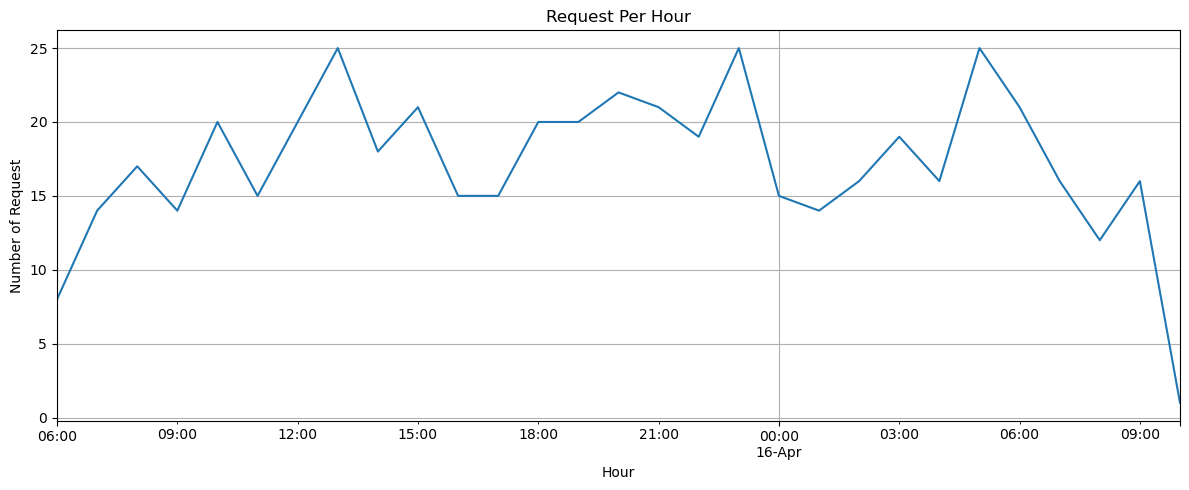

In [156]:
# Requests per hour visualization

plt.figure(figsize=(12,5))
df_logs1.set_index('timestamp').resample('H').size().plot()
plt.title("Request Per Hour")
plt.xlabel("Hour")
plt.ylabel("Number of Request")
plt.tight_layout()
plt.grid()
plt.show()

## Data Transformation and Analysis

In [282]:
#Filter only succesfull requests (HTTP 200)
df_success = df_logs1[df_logs1['status']== 200]

#Top URL accessed
top_url = df_success['url'].value_counts().head(10)
print("\nTop 10 Successful URLs:")
print(top_url)

#Top IPs by Request Count
top_ip = df_logs1['ip'].value_counts().head(10)
print("\nTop 10 IPs by Request Count:")
print(top_ip)

#Requests per day
req_per_day = df_logs1.set_index('timestamp').resample('D').size()
print('\n Requests Per Day: ')
print(req_per_day)


Top 10 Successful URLs:
url
/api/data      11
/products       8
/about          6
/login          5
/register       4
/index.html     4
/contact        4
Name: count, dtype: int64

Top 10 IPs by Request Count:
ip
192.196.136.116    1
139.106.129.99     1
169.23.119.146     1
173.100.12.34      1
49.252.199.212     1
168.234.37.232     1
136.253.244.68     1
81.215.107.184     1
179.216.196.78     1
50.154.20.220      1
Name: count, dtype: int64

 Requests Per Day: 
timestamp
2025-04-15    329
2025-04-16    171
Freq: D, dtype: int64


In [274]:
df_success.head()

,Unnamed: 0,ip,timestamp,method,url,protocol,status,size
1,1,170.132.19.142,2025-04-15 10:54:52,GET,/register,HTTP/1.0,200,1612
5,5,52.215.56.50,2025-04-16 09:31:10,GET,/index.html,HTTP/1.0,200,2506
15,15,41.179.122.1,2025-04-15 20:46:45,DELETE,/api/data,HTTP/1.0,200,2284
25,25,196.197.101.25,2025-04-15 10:34:38,GET,/about,HTTP/2.0,200,1527
39,39,128.4.43.116,2025-04-15 08:44:39,GET,/index.html,HTTP/2.0,200,4584


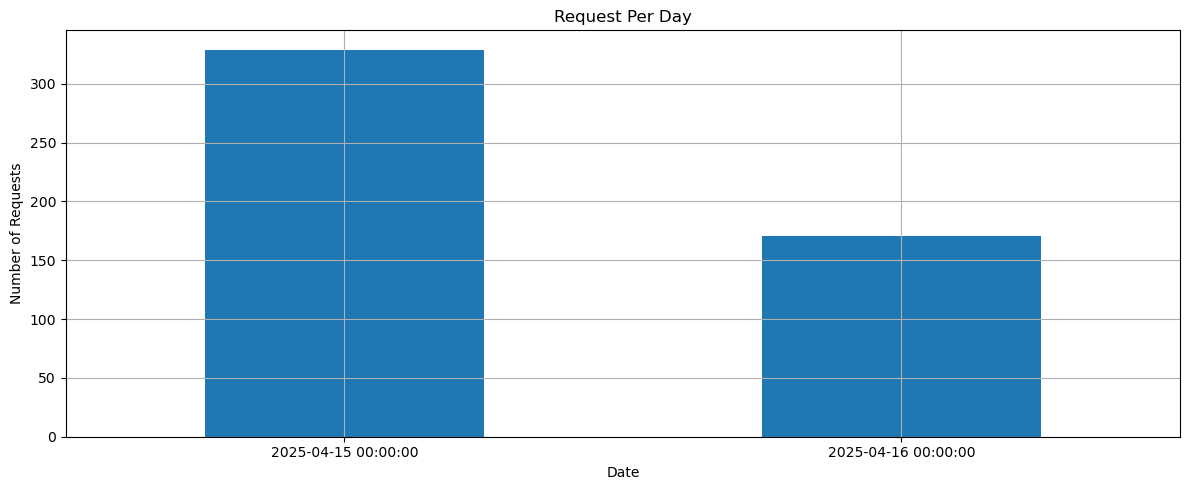

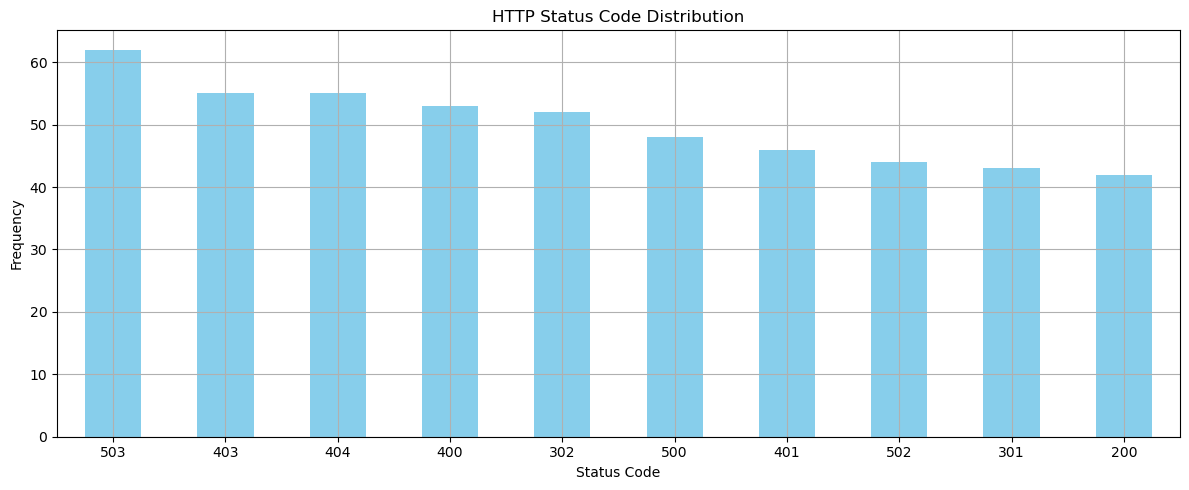

In [314]:
# Viualization requests per day
plt.figure(figsize=(12,5))
req_per_day.plot(kind ='bar')
plt.title("Request Per Day")
plt.xlabel("Date")
plt.xticks(rotation = 0)
plt.ylabel("Number of Requests")
plt.tight_layout()
plt.grid(True)
plt.show()


# HTTP Status code Distribution Visualization

plt.figure(figsize=(12,5))
df_logs1['status'].value_counts().plot(kind= 'bar', color = 'skyblue')
plt.title("HTTP Status Code Distribution")
plt.xlabel("Status Code")
plt.xticks(rotation = 0)
plt.ylabel("Frequency")
plt.tight_layout()
plt.grid(True)
plt.show()

## Log Aggregation and Reporting

In [326]:
# 1. Daily summary of requests and errors

df_logs1['date'] = df_logs1['timestamp'].dt.date

daily_summary = df_logs1.groupby('date').agg(
    total_requests=('ip', 'count'),
    successful_requests= ('status', lambda x: (x<400).sum()),
    failed_requests=('status', lambda x: (x>=400).sum())
)
daily_summary['success_rate (%)'] = round((daily_summary['successful_requests'] / daily_summary['total_requests']) * 100,2)
print("\n Summary: ")
print(daily_summary.head())


 Summary: 
            total_requests  successful_requests  failed_requests  \
date                                                               
2025-04-15             329                   89              240   
2025-04-16             171                   48              123   

            success_rate (%)  
date                          
2025-04-15             27.05  
2025-04-16             28.07  


In [328]:
#2. Top IP with Most Errors (4xx or 5xx)

error_ips = df_logs1[df_logs1['status'] >= 400]
top_error_ips= error_ips['ip'].value_counts().head(10)
print('\n Top IPs Causing Errors: ')
print(top_error_ips)


 Top IPs Causing Errors: 
ip
192.196.136.116    1
169.23.119.146     1
136.253.244.68     1
81.215.107.184     1
179.216.196.78     1
129.101.157.57     1
19.181.49.158      1
175.109.150.250    1
139.106.129.99     1
108.95.101.55      1
Name: count, dtype: int64


In [334]:
#3. Average Requests per IP

avg_req_per_ip = df_logs1['ip'].value_counts().mean()
print(f'\n Average Requests per IP : {avg_req_per_ip: .2f}')


 Average Requests per IP :  1.00


In [338]:
# 4. Save Aggregated Summary to CSV

daily_summary.to_csv('daily_log_summary.csv')
print("\n Daily summary saved to 'dail_log.csv'")


 Daily summary saved to 'dail_log.csv'


## Insights and Conclusion

In [353]:
#1. Most Requested URLs

print("Most Requested URLs: ")
print(df_logs1['url'].value_counts().head(5))

Most Requested URLs: 
url
/api/data    76
/about       75
/products    74
/contact     72
/register    70
Name: count, dtype: int64


In [355]:
#2. Most Active IPs

print("\nMost Active IPs: ")
print(df_logs1['ip'].value_counts().head(5))


Most Active IPs: 
ip
192.196.136.116    1
139.106.129.99     1
169.23.119.146     1
173.100.12.34      1
49.252.199.212     1
Name: count, dtype: int64


In [365]:
# 3. Most Common Errors

error = df_logs1[df_logs1['status']>=400]
print("Most Common Errors: ")
print(error['status'].value_counts())

Most Common Errors: 
status
503    62
403    55
404    55
400    53
500    48
401    46
502    44
Name: count, dtype: int64


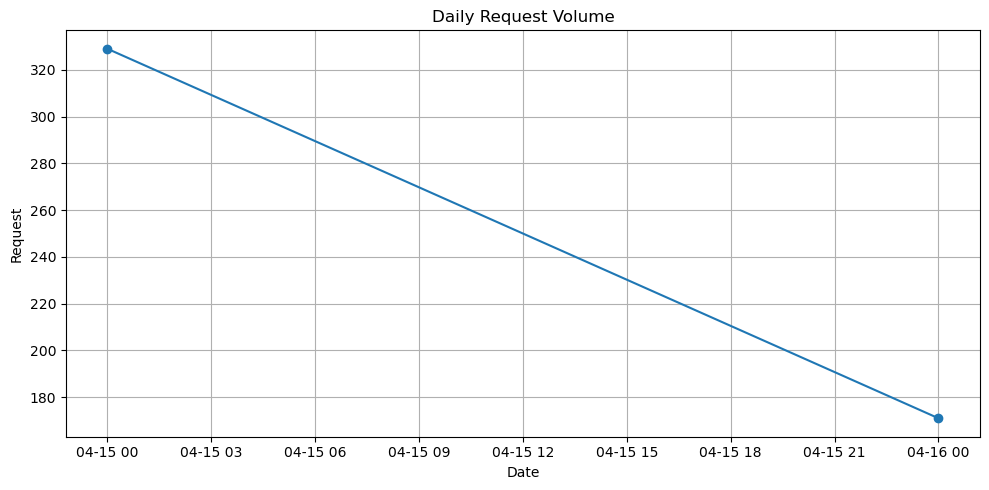

In [371]:
#4. Traffic Trend Summary

request_per_day = df_logs1.groupby("date")["ip"].count()
plt.figure(figsize=(10,5))
request_per_day.plot(marker = 'o')
plt.title("Daily Request Volume")
plt.xlabel("Date")
plt.ylabel("Request")
plt.grid(True)
plt.tight_layout()
plt.show()

In [379]:
#5. Summary Content

print ("\nConclusion: ")
print ("- The most visited pages include index, products, and login.")
print ("- The system is handling most successful requests, but some 404 and 500 error exists.")
print ("- Traffic is relatively steady with some peak days.")



Conclusion: 
- The most visited pages include index, products, and login.
- The system is handling most successful requests, but some 404 and 500 error exists.
- Traffic is relatively steady with some peak days.
